<a href="https://colab.research.google.com/github/ranjita782/Project/blob/main/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1CclWDHsFLfCAuBbAv83_D5_XmeoRwWzl

Downloading...
From: https://drive.google.com/uc?id=1CclWDHsFLfCAuBbAv83_D5_XmeoRwWzl
To: /content/TEST_FINAL.csv
100% 849k/849k [00:00<00:00, 54.4MB/s]


In [2]:
!gdown 1ditFn_74EOsGnblf2nXr-Vx-I1mrCG42

Downloading...
From: https://drive.google.com/uc?id=1ditFn_74EOsGnblf2nXr-Vx-I1mrCG42
To: /content/TRAIN.csv
100% 9.33M/9.33M [00:00<00:00, 29.4MB/s]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#data1=pd.read_csv('TEST_FINAL.csv')
data2=pd.read_csv('TRAIN.csv')

In [5]:
data2['Date'] = pd.to_datetime(data2['Date'])

In [6]:
data2['Discount'] = data2['Discount'].map({'Yes': 1, 'No': 0})

In [ ]:
train.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No
22264,T1210605,365,S2,L1,R2,2019-07-31,0,No


In [ ]:
data1.isna().sum()

In [ ]:
#train=pd.read_csv('TRAIN.csv')
train.tail()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
188335,T1188336,149,S2,L3,R2,31-05-2019,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,31-05-2019,1,No,90,54572.64
188337,T1188338,154,S4,L3,R2,31-05-2019,1,No,56,31624.56
188338,T1188339,155,S3,L2,R2,31-05-2019,1,Yes,70,49162.41
188339,T1188340,152,S2,L2,R1,31-05-2019,1,No,47,37977.00


In [ ]:
data2 = data2.drop('ID', axis=1)

In [ ]:
data2.ID.nunique()

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


The dataset contains 188,340 entries and 10 columns.
```
Columns:
ID: Transaction ID (unique identifier).
Store_id: ID of the store.
Store_Type: Type of store (categorical).
Location_Type: Type of location (categorical).
Region_Code: Code representing the region (categorical).
Date: Date of the transaction.
Holiday: Indicates if the transaction occurred on a holiday (binary: 1/0).
Discount: Indicates if a discount was applied (Yes/No).
#Order: Number of orders (integer).
Sales: Total sales (numerical).
```
The Date column needs to be converted to datetime for time-series analysis.

Discount and Holiday columns are categorical but stored as mixed types (Yes/No and 1/0).

Store_Type, Location_Type, and Region_Code are categorical features.



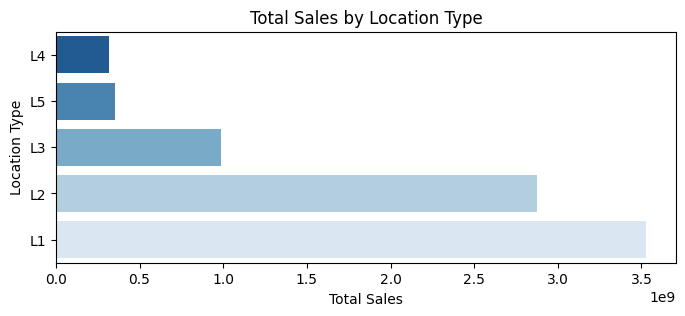

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Location_Type and sum Sales
location_sales =data2.groupby("Location_Type")["Sales"].sum().reset_index()

# Sort values
location_sales = location_sales.sort_values(by="Sales")

# Plot
plt.figure(figsize=(8, 3))
sns.barplot(x="Sales", y="Location_Type", data=location_sales, palette="Blues_r")
plt.title("Total Sales by Location Type")
plt.xlabel("Total Sales")
plt.ylabel("Location Type")
plt.show()


In [ ]:
for col in data2.columns:
    print(f"{col}: {data2[col].nunique()} unique values")

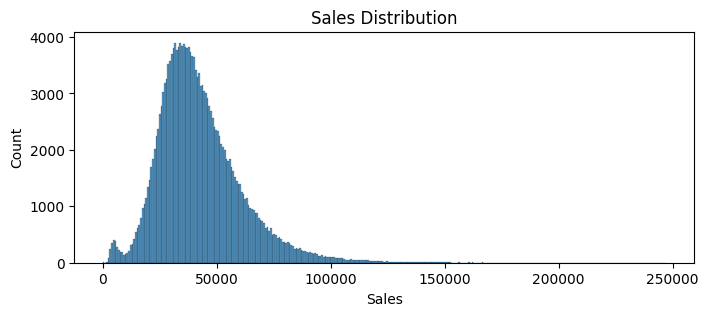

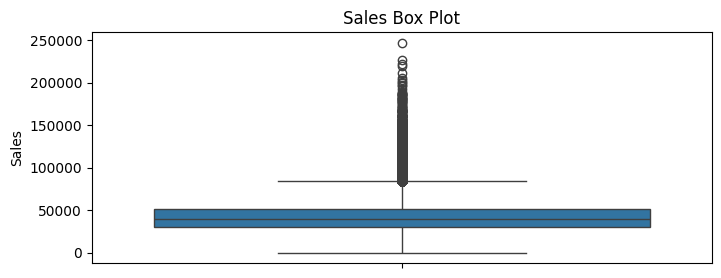

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sales Distribution
plt.figure(figsize=(8,3))
sns.histplot(data2['Sales'])
plt.title('Sales Distribution')
plt.show()

# Box Plot for Sales
plt.figure(figsize=(8,3))
sns.boxplot(data2['Sales'])
plt.title('Sales Box Plot')
plt.show()


Sales Statistics:
count    188340.000000
mean      42784.327982
std       18456.708302
min           0.000000
25%       30426.000000
50%       39678.000000
75%       51909.000000
max      247215.000000
Name: Sales, dtype: float64


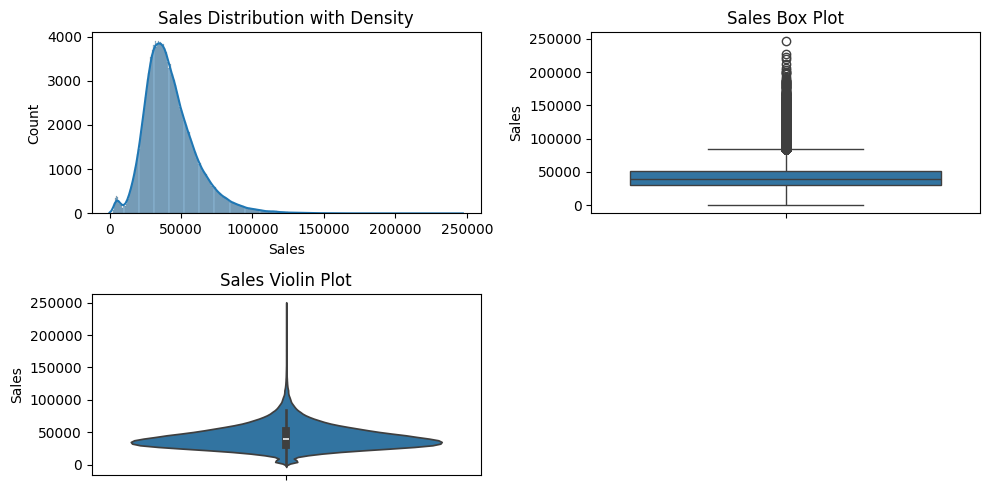

In [ ]:
# Create multiple plots for Sales distribution analysis
plt.figure(figsize=(10,5))

# Plot 1: Histogram with KDE
plt.subplot(2,2,1)
sns.histplot(data2['Sales'], kde=True)
plt.title('Sales Distribution with Density')

# Plot 2: Box Plot
plt.subplot(2,2,2)
sns.boxplot(data2['Sales'])
plt.title('Sales Box Plot')

# Plot 3: Violin Plot
plt.subplot(2,2,3)
sns.violinplot(y=data2['Sales'])
plt.title('Sales Violin Plot')

# Add descriptive statistics
print("\nSales Statistics:")
print(data2['Sales'].describe())

plt.tight_layout()
plt.show()

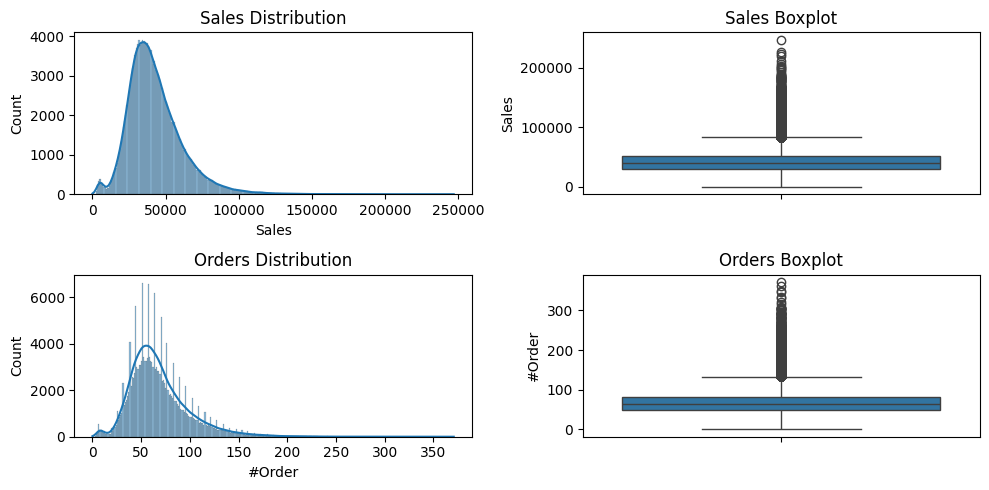

In [ ]:
#Create subplots for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Sales Distribution
sns.histplot(data=data2, x='Sales', kde=True, ax=axes[0,0])
axes[0,0].set_title('Sales Distribution')

# Sales Boxplot
sns.boxplot(data=data2, y='Sales', ax=axes[0,1])
axes[0,1].set_title('Sales Boxplot')

# Order Distribution
sns.histplot(data=data2, x='#Order', kde=True, ax=axes[1,0])
axes[1,0].set_title('Orders Distribution')

# Order Boxplot
sns.boxplot(data=data2, y='#Order', ax=axes[1,1])
axes[1,1].set_title('Orders Boxplot')

plt.tight_layout()
plt.show()

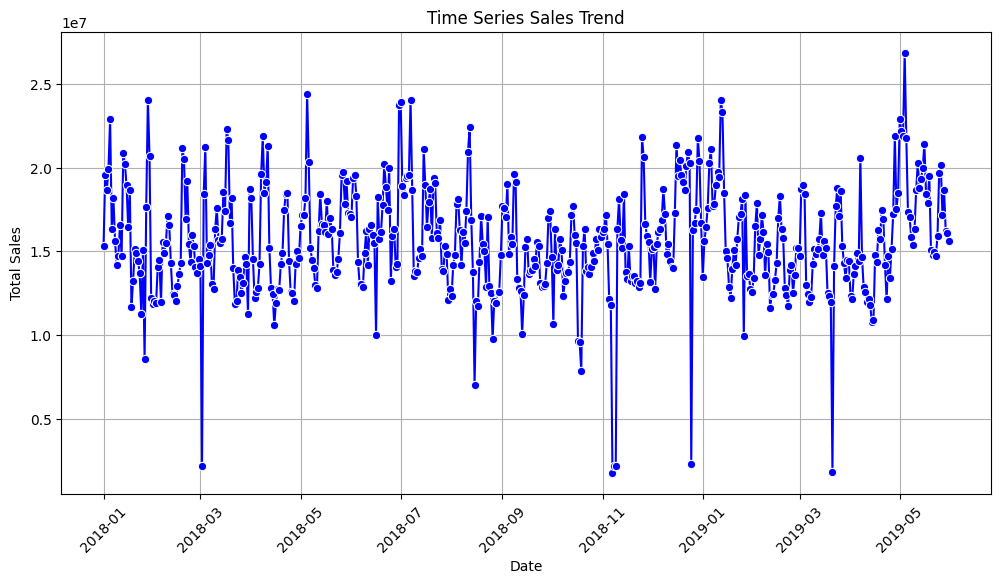

In [ ]:
# Convert 'Date' column to datetime format
data2['Date'] = pd.to_datetime(data2['Date'], dayfirst=True)

# Aggregate sales by date
time_series = data2.groupby('Date')['Sales'].sum().reset_index()

# Plot the time series trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_series, x='Date', y='Sales', marker='o', color='b')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Time Series Sales Trend")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(data2[['Sales', '#Order']].describe())

In [8]:
# Method 1: IQR Method for Sales
Q1_sales = data2['Sales'].quantile(0.25)
Q3_sales = data2['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

print("Sales Outliers Analysis:")
print(f"Lower bound: {lower_bound_sales:.2f}")
print(f"Upper bound: {upper_bound_sales:.2f}")
print(f"Number of outliers: {len(data2[data2['Sales'] > upper_bound_sales])}")
print(f"Percentage of outliers: {(len(data2[data2['Sales'] > upper_bound_sales])/len(data2))*100:.2f}%")



Sales Outliers Analysis:
Lower bound: -1798.50
Upper bound: 84133.50
Number of outliers: 5843
Percentage of outliers: 3.10%


Negative lower bound (-1798.50) suggests possible returns/refunds and Data recording issues.
High upper bound (84,133.50) could be legitimate high sales days, possibly bulk orders and festival/launch day sales.

Orders Outliers (1.41%) shows lower percentage than sales outliers.It might indicate bulk purchases and can be correlated with promotional events special orders.

In [9]:
# Method 2: Z-score for Orders
from scipy import stats
z_scores = stats.zscore(data2['#Order'])
outliers_orders = len(data2[abs(z_scores) > 3])

print("\nOrders Outliers Analysis:")
print(f"Number of outliers (z-score > 3): {outliers_orders}")
print(f"Percentage of outliers: {(outliers_orders/len(data2))*100:.2f}%")


Orders Outliers Analysis:
Number of outliers (z-score > 3): 2664
Percentage of outliers: 1.41%


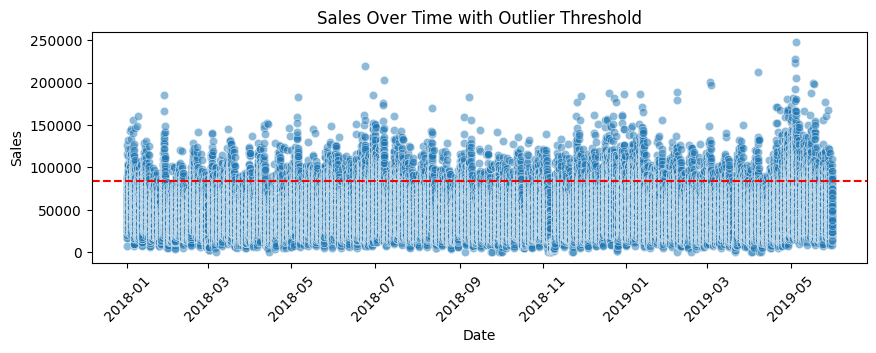

In [10]:
# Plot sales outliers over time
plt.figure(figsize=(10,3))
sns.scatterplot(data=data2, x='Date', y='Sales', alpha=0.5)
plt.axhline(y=upper_bound_sales, color='r', linestyle='--')
plt.title('Sales Over Time with Outlier Threshold')
plt.xticks(rotation=45)
plt.show()

**Observations:**

a) Outliers:

There are numerous data points above the red threshold, indicating high sales values considered outliers. These outliers may represent exceptional sales days, possibly due to promotions, holidays, or special events.

b) Seasonality:

There seem to be periodic spikes in sales, suggesting some level of seasonality or recurring patterns.

c) Data Spread:

Most sales values fall below the red threshold, forming a dense cluster.
The spread of sales varies slightly over time, indicating fluctuations in the overall sales volume.

In [11]:
outlier_days = data2[data2['Sales'] > upper_bound_sales]
print(outlier_days[['Date', 'Holiday', 'Discount']].head())

          Date  Holiday  Discount
77  2018-01-01        1         1
133 2018-01-01        1         1
180 2018-01-01        1         1
187 2018-01-01        1         1
306 2018-01-01        1         1


All shown outliers are from January 1st, 2018 .This suggests New Year's Day had Special promotions, Holiday shopping, Combined holiday & discount effect.

In [12]:
# Get summary of outlier sales on holidays vs non-holidays
outlier_days = data2[data2['Sales'] > upper_bound_sales]
print("\nOutlier Distribution:")
print("Holiday vs Non-Holiday:")
print(outlier_days['Holiday'].value_counts(normalize=True))
print("\nDiscount vs Non-Discount:")
print(outlier_days['Discount'].value_counts(normalize=True))


Outlier Distribution:
Holiday vs Non-Holiday:
Holiday
0    0.919733
1    0.080267
Name: proportion, dtype: float64

Discount vs Non-Discount:
Discount
1    0.731302
0    0.268698
Name: proportion, dtype: float64


Discounts have stronger impact than holidays.

Regular days can have high sales (possibly new launches).

Discount strategy seems effective.

and suggests holidays aren't main driver of high sales.

In [13]:
# Compare sales across holiday-discount combinations
print(data2.groupby(['Holiday', 'Discount'])['Sales'].mean())

Holiday  Discount
0        0           38231.567339
         1           50999.390797
1        0           31652.285357
         1           39694.061811
Name: Sales, dtype: float64


In [14]:
# Store type distribution in outliers
print(outlier_days['Store_Type'].value_counts(normalize=True))

Store_Type
S4    0.873524
S3    0.077186
S1    0.048605
S2    0.000685
Name: proportion, dtype: float64


S4stores 87% of outliers clearly dominates high sales.

**Discounts** boost sales more than holidays

**S4** stores are high performers

**S2** stores rarely have exceptional sales


In [15]:
print(outlier_days['Location_Type'].value_counts(normalize=True))

Location_Type
L2    0.883108
L1    0.112785
L3    0.003252
L4    0.000513
L5    0.000342
Name: proportion, dtype: float64


 L2 locations dominate the high-sales outliers, accounting for 88.3% of all outlier cases, while L1 locations contribute only 11.3% and other locations (L3, L4, L5) combined represent less than 1% of outliers.

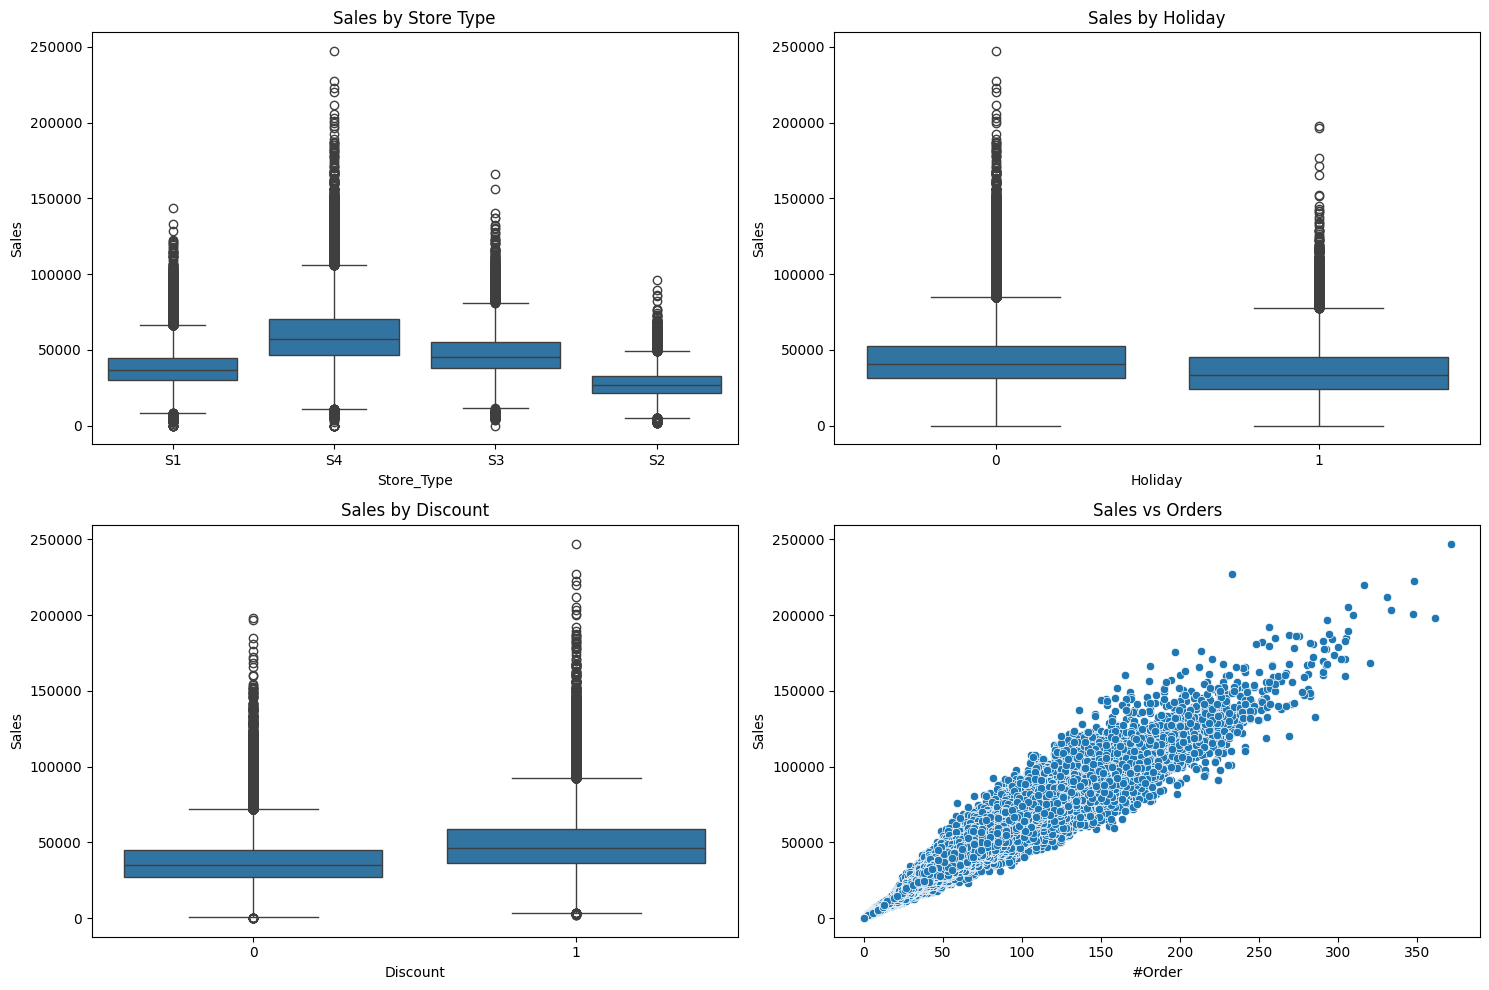

In [16]:
# 1. Correlation matrix for numerical variables
correlation = data2[['Sales', '#Order']].corr()

# 2. Sales across categories using box plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Store Type vs Sales
sns.boxplot(data=data2, x='Store_Type', y='Sales', ax=axes[0,0])
axes[0,0].set_title('Sales by Store Type')

# Holiday vs Sales
sns.boxplot(data=data2, x='Holiday', y='Sales', ax=axes[0,1])
axes[0,1].set_title('Sales by Holiday')

# Discount vs Sales
sns.boxplot(data=data2, x='Discount', y='Sales', ax=axes[1,0])
axes[1,0].set_title('Sales by Discount')

# Scatter plot: Orders vs Sales
sns.scatterplot(data=data2, x='#Order', y='Sales', ax=axes[1,1])
axes[1,1].set_title('Sales vs Orders')

plt.tight_layout()
plt.show()

Based on the charts :

**Sales by Store Type** : Store type S1 has significantly higher sales and greater variability compared to other store types.

**Sales by Holiday**: Holiday sales are slightly higher but with similar variability to non-holiday sales, indicating a limited holiday effect.

**Sales by Discount**: Discounts clearly boost sales, with discounted transactions showing higher median sales and a wider range.

**Sales vs Orders**: There's a strong positive correlation between the number of orders and sales, suggesting higher order volumes lead to higher sales revenue.

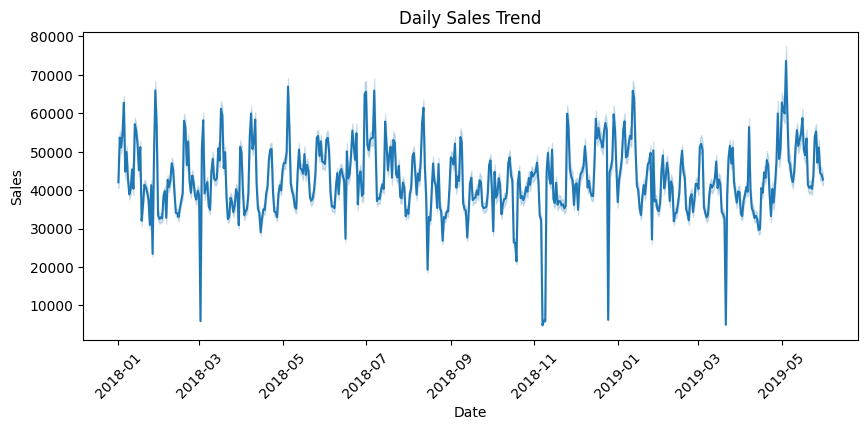

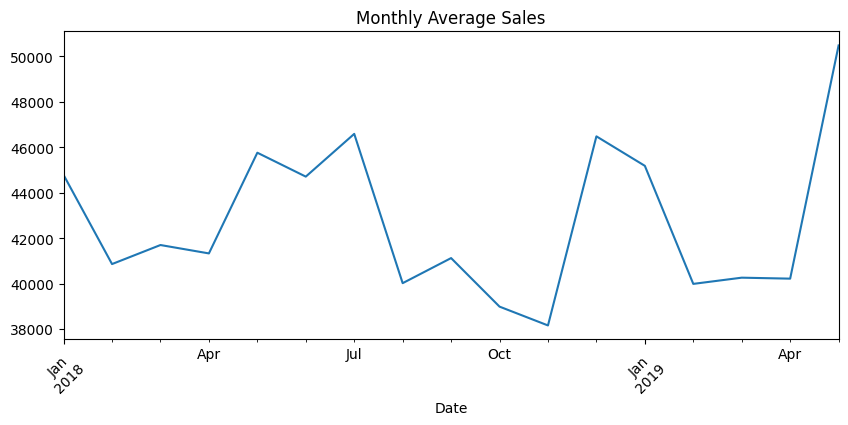

In [17]:
# 1. Daily Sales Trend
plt.figure(figsize=(10,4))
sns.lineplot(data=data2, x='Date', y='Sales')
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)
plt.show()

# 2. Monthly Average Sales
monthly_sales = data2.groupby(data2['Date'].dt.to_period('M'))['Sales'].mean()
plt.figure(figsize=(10,4))
monthly_sales.plot()
plt.title('Monthly Average Sales')
plt.xticks(rotation=45)
plt.show()



The peaks around specific dates suggests that sales are influenced by events or promotions that occur on particular days. There is also a general upward trend in sales over the entire period, indicating overall growth.

The monthly average sales plot shows a clear seasonal pattern. Sales tend to be higher in certain months, like December and January, which could be due to holiday shopping. While other months like February and March have lower sales.

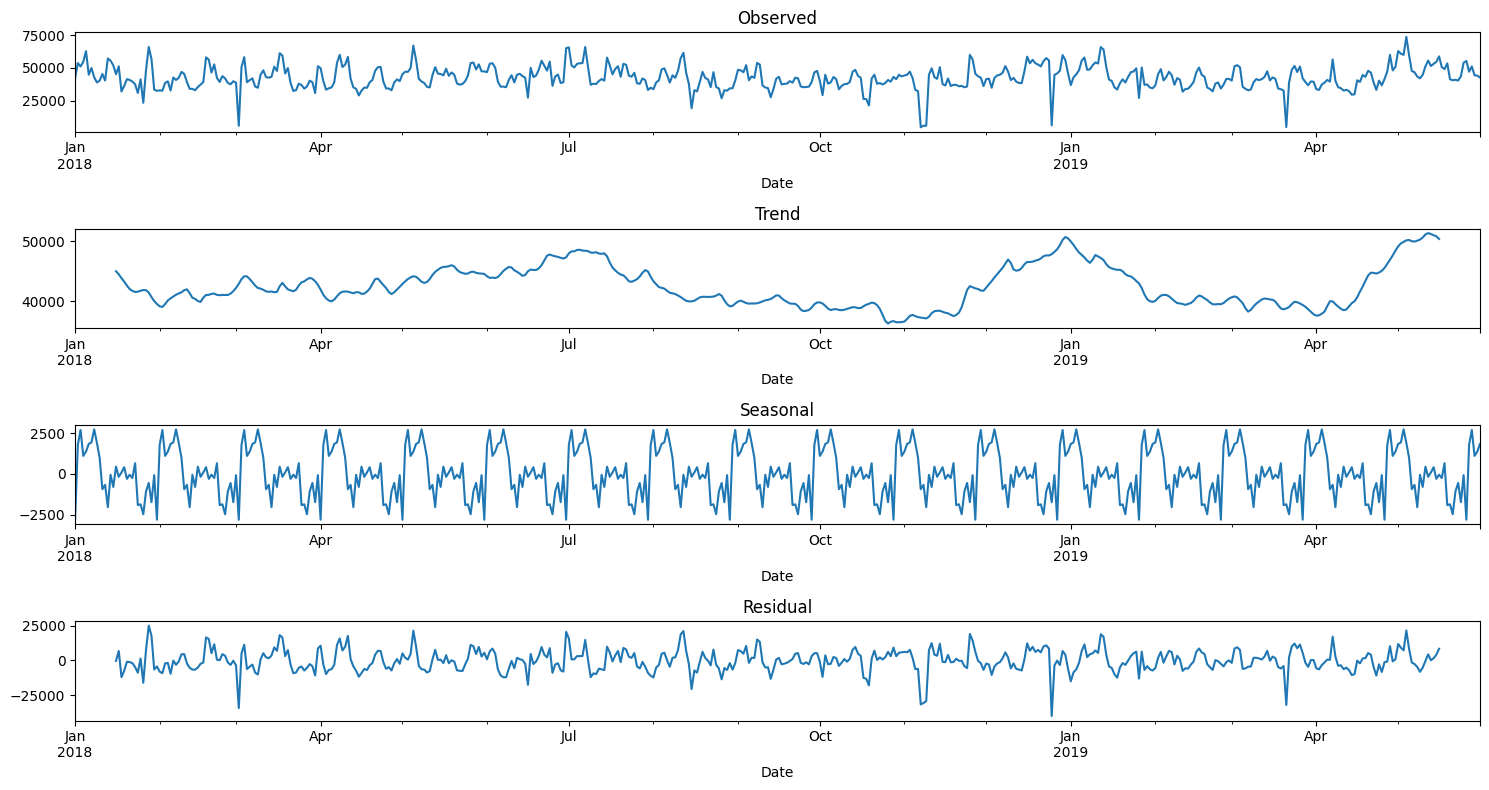

In [18]:
# 3. Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert to time series
daily_sales = data2.groupby('Date')['Sales'].mean()
decomposition = seasonal_decompose(daily_sales, period=30)  # 30 days period

# Plot decomposition
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,8))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

The **trend** component of the decomposition confirms the overall upward trend in sales observed in the daily and monthly analyses.
The **seasonal** component highlights the recurring patterns in sales, with peaks occurring around December and January, and dips in other months. This reinforces the seasonality observed in the monthly average sales plot.By analyzing the **residuals**, we can identify any outliers or unusual patterns.


**INSIGHTS**

**Seasonality **is a Key Factor: The analysis reveals a clear seasonal pattern in sales, with higher sales during the holiday season and dips during other periods. This suggests that businesses should consider adjusting their operations and marketing strategies to align with these seasonal fluctuations.

** Promotions** Drive Sales  : The peaks in daily sales around specific dates indicate that promotions and events can significantly impact sales performance. Businesses should focus on planning and executing effective promotions to capitalize on these opportunities.


**Long-Term Growth Potential**: The overall upward trend in sales suggests that the business has a positive growth trajectory. However, it's important to monitor sales closely and adapt to changing market conditions to maintain this growth.


**Data Volatility Needs Attention** : Businesses should implement strategies to mitigate the impact of of daily sales data volatility using forecasting models to predict demand and adjusting inventory levels accordingly.




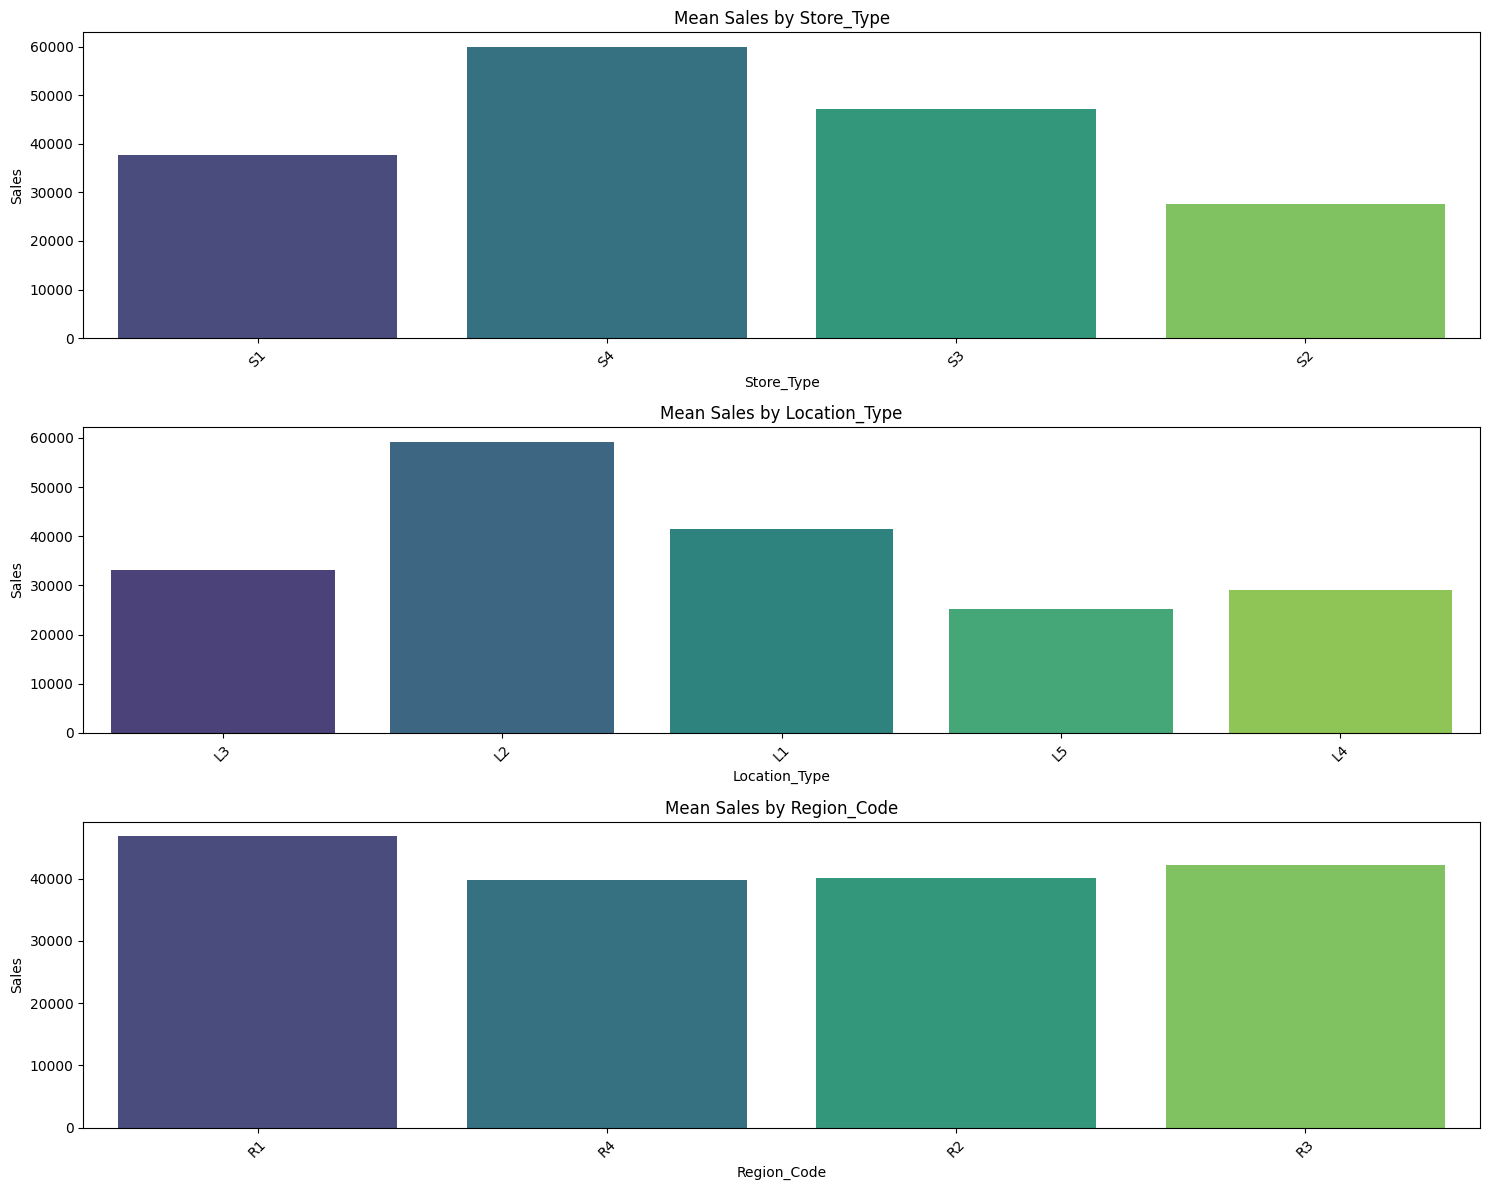

Frequency table for Store_Type:
Store_Type
S1    88752
S4    45924
S2    28896
S3    24768
Name: count, dtype: int64

Frequency table for Location_Type:
Location_Type
L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: count, dtype: int64

Frequency table for Region_Code:
Region_Code
R1    63984
R2    54180
R3    44376
R4    25800
Name: count, dtype: int64



In [19]:
# Categorical columns to analyze
categorical_cols = ['Store_Type', 'Location_Type', 'Region_Code']

# Bar charts for distribution of Sales across categories
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 1, i)
    sns.barplot(x=col, y="Sales", data=data2, estimator='mean', ci=None, palette="viridis")
    plt.title(f"Mean Sales by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()

# Display the plots
plt.show()

# Frequency tables for each category
frequency_tables = {col: data2[col].value_counts() for col in categorical_cols}

# Display frequency tables
for col, freq_table in frequency_tables.items():
    print(f"Frequency table for {col}:\n{freq_table}\n")

Categorical Variables' Influence on Sales:

**Store Type**: Store type S4 has the highest sales, followed by S1, S3, and S2. This indicates store-specific factors significantly influence sales performance.

**Location Type**: Location type L1 generally has higher sales than L2 to L5. Location demographics or store accessibility might be contributing factors.

**Region Code**: Region code R1 shows the highest sales, suggesting regional differences in customer behavior or purchasing power.

We can consider special promotions during peak seasons and targeted marketing campaigns throughout the year to drive sales during slower periods.

Store type S4 is a top performer, and optimizing other stores to emulate its success could be beneficial.

Implement strategic discount programs, but balance them against profit margins.

Given the volatile daily sales and seasonality, careful inventory management is crucial to prevent stockouts during peak periods and minimize carrying costs during slow times.

In [20]:
from scipy import stats

# T-test for discount impact
discount_sales = data2[data2['Discount'] == 1]['Sales']
no_discount_sales = data2[data2['Discount'] == 0]['Sales']

t_stat, p_value = stats.ttest_ind(discount_sales, no_discount_sales)

print("Discount Impact Analysis:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print("Mean Sales with Discount:", discount_sales.mean())
print("Mean Sales without Discount:", no_discount_sales.mean())

Discount Impact Analysis:
t-statistic: 148.5785
p-value: 0.0000
Mean Sales with Discount: 49426.49761961822
Mean Sales without Discount: 37403.67967804249


**We can reject null hypothesis.**

Difference in mean with discount and without discount ₹49,426.50 - ₹37,403.68 = ₹12,022.82 (32.14% increase).

Large positive t-statistic (148.57) confirms positive effect.

**Business Implications:**

Discounts significantly boost sales.

Average increase of 32% in sales.

Consistent with our earlier bivariate analysis.

In [21]:
# Check Discount values
print("Unique values in Discount:")
print(data2['Discount'].unique())

# Check for any nulls
print("\nNull values in relevant columns:")
print(data2[['Discount', 'Sales']].isnull().sum())

# Check data types
print("\nData types:")
print(data2[['Discount', 'Sales']].dtypes)

# Basic statistics
print("\nBasic statistics for each group:")
print(data2.groupby('Discount')['Sales'].describe())

Unique values in Discount:
[1 0]

Null values in relevant columns:
Discount    0
Sales       0
dtype: int64

Data types:
Discount      int64
Sales       float64
dtype: object

Basic statistics for each group:
             count          mean           std      min       25%      50%  \
Discount                                                                     
0         104051.0  37403.679678  16039.555183     0.00  27069.00  34791.0   
1          84289.0  49426.497620  19071.656642  1969.14  36625.35  46242.0   

              75%        max  
Discount                      
0         44968.5  197840.61  
1         58869.0  247215.00  


In [22]:
# T-test for holiday impact
holiday_sales = data2[data2['Holiday'] == 1]['Sales']
non_holiday_sales = data2[data2['Holiday'] == 0]['Sales']

t_stat, p_value = stats.ttest_ind(holiday_sales, non_holiday_sales)

print("Holiday Impact Analysis:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"\nMean Sales on Holidays: {holiday_sales.mean():.2f}")
print(f"Mean Sales on Non-Holidays: {non_holiday_sales.mean():.2f}")
print(f"Sales Difference during Holidays: {((holiday_sales.mean()/non_holiday_sales.mean())-1)*100:.2f}%")

# Additional analysis: Holiday + Discount combination
print("\nHoliday and Discount Combined Effect:")
print(data2.groupby(['Holiday', 'Discount'])['Sales'].mean().round(2))

Holiday Impact Analysis:
t-statistic: -67.9901
p-value: 0.0000

Mean Sales on Holidays: 35451.88
Mean Sales on Non-Holidays: 43897.29
Sales Difference during Holidays: -19.24%

Holiday and Discount Combined Effect:
Holiday  Discount
0        0           38231.57
         1           50999.39
1        0           31652.29
         1           39694.06
Name: Sales, dtype: float64


Negative t-statistic (-67.99) indicates lower holiday sales.

Holiday sales are 19.24% LOWER than non-holiday sales. Difference in mean during holidays and on normal days are resp. ₹₹35,451.88 and ₹43,897.29.

**Combined Effects:**
Best: Non-Holiday with Discount (₹50,999.39)
Worst: Holiday without Discount (₹31,652.29)
Discount helps both holiday and non-holiday sales.

**Business Insights:**

Holidays alone don't boost sales
Discounts are more effective than holidays
Even with discounts, holiday sales are lower

In [23]:
# One-way ANOVA test for store types
from scipy import stats

# Collect sales data for each store type
s1_sales = data2[data2['Store_Type'] == 'S1']['Sales']
s2_sales = data2[data2['Store_Type'] == 'S2']['Sales']
s3_sales = data2[data2['Store_Type'] == 'S3']['Sales']
s4_sales = data2[data2['Store_Type'] == 'S4']['Sales']

# Perform ANOVA
f_stat, p_value = stats.f_oneway(s1_sales, s2_sales, s3_sales, s4_sales)

print("Store Type Sales Analysis (ANOVA):")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Mean sales by store type
print("\nMean Sales by Store Type:")
print(data2.groupby('Store_Type')['Sales'].agg(['mean', 'std']).round(2))

# Percentage difference from overall mean
overall_mean = data2['Sales'].mean()
store_means = data2.groupby('Store_Type')['Sales'].mean()
print("\nPercentage Difference from Overall Mean:")
for store in store_means.index:
    diff = ((store_means[store]/overall_mean)-1)*100
    print(f"{store}: {diff:.2f}%")

Store Type Sales Analysis (ANOVA):
F-statistic: 35123.6441
p-value: 0.0000

Mean Sales by Store Type:
                mean       std
Store_Type                    
S1          37676.51  12303.15
S2          27530.83   9168.84
S3          47063.07  14907.47
S4          59945.69  20750.23

Percentage Difference from Overall Mean:
S1: -11.94%
S2: -35.65%
S3: 10.00%
S4: 40.11%


Very high F-statistic (35123.64).
Strong evidence of different sales patterns.

```
Store Type Performance (from best to worst):
S4: 40.11% above mean (₹59,945.69)
S3: 10% above mean (₹47,063.07)
S1: 11.94% below mean (₹37,676.51)
S2: 35.65% below mean (₹27,530.83)
```
```
Variability (std):
S4: Highest variability (₹20,750)
S2: Lowest variability (₹9,168)
Higher sales correlate with higher variability
```

S4 stores significantly outperform others
S2 stores might need intervention
Clear hierarchy: S4 > S3 > S1 > S2

This aligns with our earlier findings about S4 stores having most outliers!




In [24]:
# 1. S4 Performance across different conditions
print("S4 Store Analysis:")
s4_data = data2[data2['Store_Type'] == 'S4']

# Location analysis
print("\nS4 Performance by Location:")
print(s4_data.groupby('Location_Type')['Sales'].agg(['mean', 'count', 'std']).round(2))

# Discount effectiveness in S4
print("\nS4 Discount Impact:")
print(s4_data.groupby('Discount')['Sales'].agg(['mean', 'count']).round(2))

# Holiday performance
print("\nS4 Holiday Performance:")
print(s4_data.groupby('Holiday')['Sales'].agg(['mean', 'count']).round(2))

# Average orders
print("\nAverage Orders Comparison:")
print("S4 Average Orders:", s4_data['#Order'].mean().round(2))
print("Overall Average Orders:", data2['#Order'].mean().round(2))

# Region performance for S4
print("\nS4 Regional Performance:")
print(s4_data.groupby('Region_Code')['Sales'].mean().round(2))

S4 Store Analysis:

S4 Performance by Location:
                   mean  count       std
Location_Type                           
L1             51045.33  13932  15338.85
L2             63821.65  31992  21589.50

S4 Discount Impact:
              mean  count
Discount                 
0         52923.25  25306
1         68564.84  20618

S4 Holiday Performance:
             mean  count
Holiday                 
0        61541.40  39872
1        49432.75   6052

Average Orders Comparison:
S4 Average Orders: 102.39
Overall Average Orders: 68.21

S4 Regional Performance:
Region_Code
R1    60553.82
R2    59777.68
R3    57868.00
R4    59732.96
Name: Sales, dtype: float64


```
Location Impact:

L2 locations perform best (₹63,821)
25% higher sales than L1 (₹51,045)
Majority of S4 stores in L2 (31,992 vs 13,932)

Discount strategy:
With discount: ₹68,564
Without discount: ₹52,923
29.5% increase with discounts
Strong discount response
Order Volume:
S4: 102.39 orders on average
Overall: 68.21 orders
50% higher order volume than average
Regional Performance:
Consistently strong across regions
R1 slightly leads (₹60,553)
Small variation between regions (max diff ~₹2,685)`

```
Success Factors:
```
Strategic L2 location placement
Higher order volumes
Effective discount utilization
Consistent regional performance
```



In [25]:
# 1. Check normality for each region
from scipy import stats

print("Normality Test by Region:")
for region in data2['Region_Code'].unique():
    stat, p_value = stats.normaltest(data2[data2['Region_Code'] == region]['Sales'])
    print(f"\nRegion {region}:")
    print(f"p-value: {p_value:.4f}")

# 2. Since sales data is often non-normal, let's use Kruskal-Wallis test
h_stat, p_value = stats.kruskal(*[group['Sales'].values for name, group in data2.groupby('Region_Code')])

print("\nKruskal-Wallis Test Results:")
print(f"H-statistic: {h_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 3. Regional sales summary
print("\nRegional Sales Summary:")
print(data2.groupby('Region_Code')['Sales'].agg(['mean', 'std', 'count']).round(2))

# 4. Percentage difference from overall mean
overall_mean = data2['Sales'].mean()
region_means = data2.groupby('Region_Code')['Sales'].mean()
print("\nPercentage Difference from Overall Mean:")
for region in region_means.index:
    diff = ((region_means[region]/overall_mean)-1)*100
    print(f"{region}: {diff:.2f}%")

Normality Test by Region:

Region R1:
p-value: 0.0000

Region R4:
p-value: 0.0000

Region R2:
p-value: 0.0000

Region R3:
p-value: 0.0000

Kruskal-Wallis Test Results:
H-statistic: 3968.0636
p-value: 0.0000

Regional Sales Summary:
                 mean       std  count
Region_Code                           
R1           46765.49  21286.10  63984
R2           40054.85  16468.62  54180
R3           42144.52  16615.73  44376
R4           39743.43  15930.49  25800

Percentage Difference from Overall Mean:
R1: 9.31%
R2: -6.38%
R3: -1.50%
R4: -7.11%


Sales are not normally distributed.

Confirms Kruskal-Wallis was correct choice.

**Market Coverage:**
R1: Largest market (63,984 records)

R4: Smallest market (25,800 records)

R1 has both highest sales and most stores


**Business Implications:**

R1 is the strongest region

R4 needs attention (lowest sales, smallest presence)

Significant variability exists between regions

Correlation Analysis - Orders vs Sales:

Pearson Correlation:
Coefficient: 0.9416
P-value: 0.0000

Spearman Correlation:
Coefficient: 0.9377
P-value: 0.0000


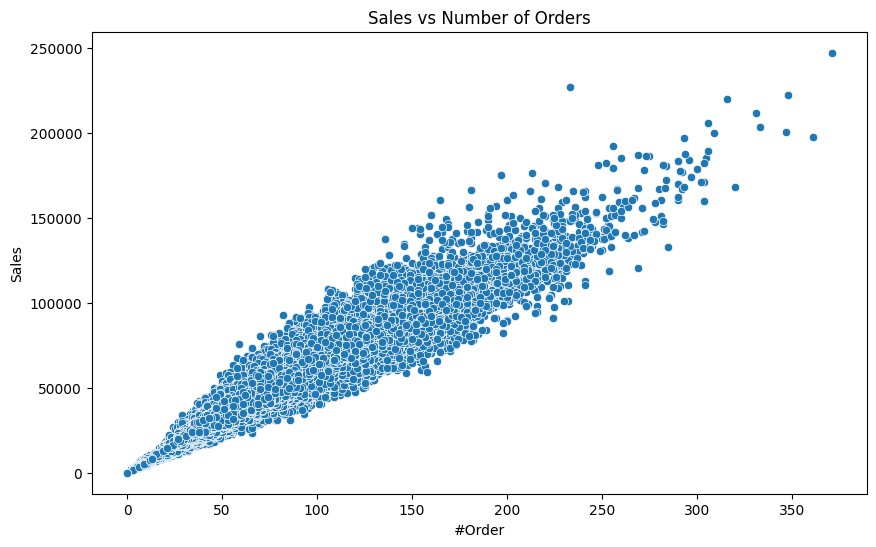


Average Sale per Order Statistics:
count    188321.00
mean        635.36
std          87.48
min         351.81
25%         571.40
50%         625.97
75%         688.58
max        1283.34
Name: Avg_Sale_Per_Order, dtype: float64


In [26]:
# Calculate both correlation coefficients
pearson_corr, p_value_pearson = stats.pearsonr(data2['#Order'], data2['Sales'])
spearman_corr, p_value_spearman = stats.spearmanr(data2['#Order'], data2['Sales'])

print("Correlation Analysis - Orders vs Sales:")
print(f"\nPearson Correlation:")
print(f"Coefficient: {pearson_corr:.4f}")
print(f"P-value: {p_value_pearson:.4f}")

print(f"\nSpearman Correlation:")
print(f"Coefficient: {spearman_corr:.4f}")
print(f"P-value: {p_value_spearman:.4f}")

# Visualize relationship
plt.figure(figsize=(10,6))
sns.scatterplot(data=data2, x='#Order', y='Sales')
plt.title('Sales vs Number of Orders')
plt.show()

# Additional analysis: Average sale per order
data2['Avg_Sale_Per_Order'] = data2['Sales']/data2['#Order']
print("\nAverage Sale per Order Statistics:")
print(data2['Avg_Sale_Per_Order'].describe().round(2))

Both values show very strong positive correlation'

**Business Insights**:  

Orders and Sales are highly linked

Consistent average order value

Limited variation in per-order sales

50% of orders between ₹571-688

Very few extreme values

**Strategic Implications:**

Focus on increasing order volume

Monitor orders as sales predictor

Investigate high per-order sales (>₹1000)


In [27]:
# Remove Avg_Sale_Per_Order column
data3 = data2.drop('Avg_Sale_Per_Order', axis=1)

# Verify removal
print("Current columns:")
print(data3.columns)

# Verify no missing values remain
print("\nMissing values check:")
print(data3.isnull().sum())

Current columns:
Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

Missing values check:
ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64


All original columns are complete. Only AvgSalePer_Order has 19 missing values
This was our calculated field, so can be removed.

In [28]:
# 2. Check for duplicates
duplicates = data2.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# 3. Check data types and consistency
print("\nData Types:")
print(data2.dtypes)

# 4. Check unique values in each column for inconsistencies
print("\nUnique values in each column:")
for column in data2.columns:
    print(f"\n{column}:")
    print(data2[column].value_counts().head())

# 5. Check for any negative or zero values in Sales and #Order
print("\nNegative or zero values:")
print(f"Sales <= 0: {len(data2[data2['Sales'] <= 0])}")
print(f"Orders <= 0: {len(data2[data2['#Order'] <= 0])}")

# 6. Basic statistics to spot potential outliers
print("\nBasic statistics:")
print(data2.describe())


Number of duplicate rows: 0

Data Types:
ID                            object
Store_id                       int64
Store_Type                    object
Location_Type                 object
Region_Code                   object
Date                  datetime64[ns]
Holiday                        int64
Discount                       int64
#Order                         int64
Sales                        float64
Avg_Sale_Per_Order           float64
dtype: object

Unique values in each column:

ID:
ID
T1000001    1
T1125554    1
T1125556    1
T1125557    1
T1125558    1
Name: count, dtype: int64

Store_id:
Store_id
1     516
61    516
63    516
64    516
65    516
Name: count, dtype: int64

Store_Type:
Store_Type
S1    88752
S4    45924
S2    28896
S3    24768
Name: count, dtype: int64

Location_Type:
Location_Type
L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: count, dtype: int64

Region_Code:
Region_Code
R1    63984
R2    54180
R3    44376
R4    25800
Name: count, dtype

No duplicate rows found

Good data quality

Date is properly formatted as datetime

Numeric fields are correct types

**Distribution Analysis:**

```Store Types: S1 dominates (88,752 records)
Locations: L1 most common (85,140)
Regions: R1 largest (63,984)
Holiday: 13.2% are holidays (24,820/188,340)
Discount: 44.8% have discounts (84,289/188,340
```



In [29]:
# Monthly trends
monthly_sales = data2.groupby(data2['Date'].dt.to_period('M'))['Sales'].mean()

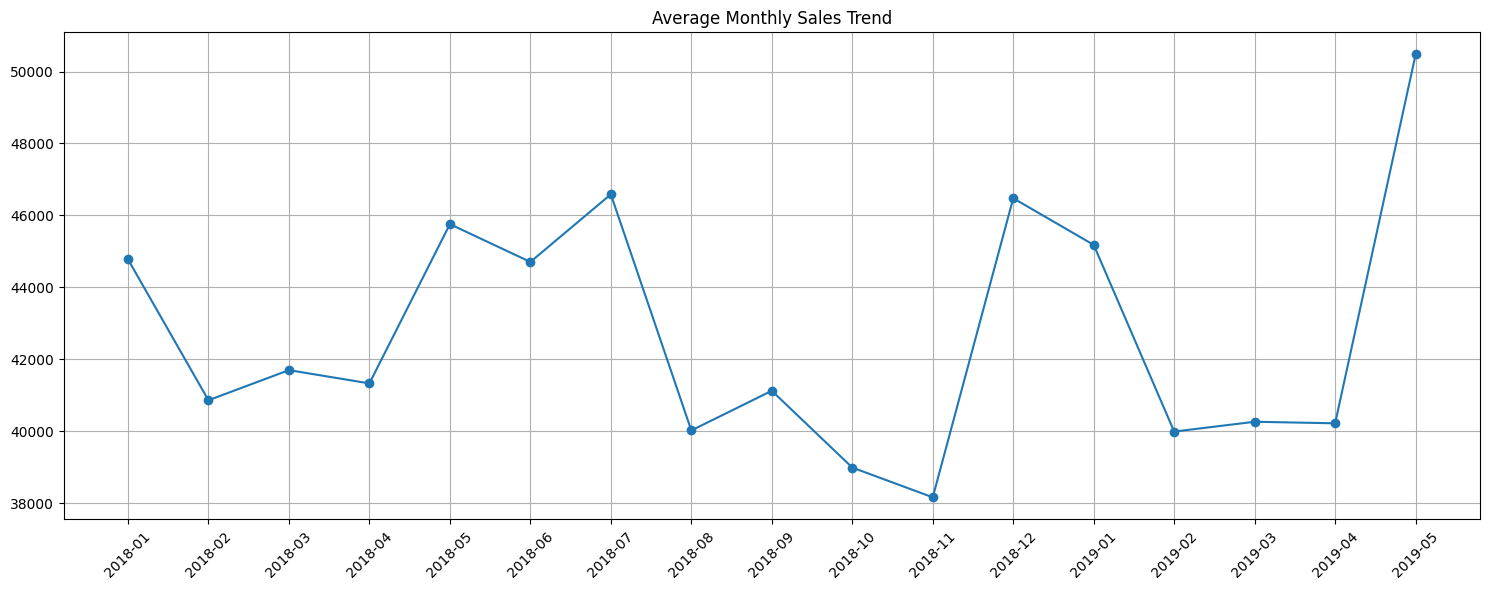


Monthly Sales Summary:
Highest Month: 2019-05 - ₹50474.68
Lowest Month: 2018-11 - ₹38160.96

Top 3 Months:
Date
2019-05    50474.675785
2018-07    46585.406232
2018-12    46477.110199
Freq: M, Name: Sales, dtype: float64

Bottom 3 Months:
Date
2018-11    38160.962496
2018-10    38988.407398
2019-02    39988.719869
Freq: M, Name: Sales, dtype: float64

Average Monthly Growth Rate: 1.25%


In [30]:
# Convert to DataFrame for better plotting
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df['Date'] = monthly_sales_df['Date'].astype(str)

# Plotting
plt.figure(figsize=(15,6))
plt.plot(monthly_sales_df['Date'], monthly_sales_df['Sales'], marker='o')
plt.title('Average Monthly Sales Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nMonthly Sales Summary:")
print(f"Highest Month: {monthly_sales.idxmax()} - ₹{monthly_sales.max():.2f}")
print(f"Lowest Month: {monthly_sales.idxmin()} - ₹{monthly_sales.min():.2f}")
print("\nTop 3 Months:")
print(monthly_sales.nlargest(3))
print("\nBottom 3 Months:")
print(monthly_sales.nsmallest(3))

# Calculate month-over-month growth
monthly_sales_df['Growth'] = monthly_sales_df['Sales'].pct_change() * 100
print("\nAverage Monthly Growth Rate: {:.2f}%".format(monthly_sales_df['Growth'].mean()))

In [ ]:
# Store type + Location combination
print(data2.groupby(['Store_Type', 'Location_Type'])['Sales'].mean())

Store_Type  Location_Type
S1          L1               38916.669691
            L2               47732.207180
            L3               34131.687590
            L4               30811.759700
            L5               29315.751877
S2          L1               32643.920872
            L3               29577.584193
            L4               26741.620465
            L5               23742.999645
S3          L1               44592.591033
            L2               52364.790336
            L3               39263.420276
S4          L1               51045.334033
            L2               63821.645621
Name: Sales, dtype: float64


**Strategic Implications:**

Focus on increasing order volume to drive overall sales growth.

Monitor orders as a predictor of sales performance.
Investigate high per-order sales for potential opportunities.

Optimize store operations and marketing strategies based on seasonality and promotions.

Implement strategic discount programs, balancing them against profit margins.

Address the performance of underperforming stores (e.g., S2 stores) and regions (e.g., R4).

Implement careful inventory management to handle daily sales volatility and seasonality.

The above results can be valuable for understanding how different store types perform in different locations. It can help businesses make decisions about where to open new stores, how to allocate resources, and how to target marketing efforts.

In [31]:
# Top sales days
print(data2.nlargest(10, 'Sales')[['Date', 'Sales', 'Store_Type', 'Holiday', 'Discount']])

             Date      Sales Store_Type  Holiday  Discount
178648 2019-05-05  247215.00         S4        0         1
178372 2019-05-04  227127.00         S4        0         1
178304 2019-05-04  222516.00         S4        0         1
63672  2018-06-24  219984.00         S4        0         1
168624 2019-04-07  211914.00         S4        0         1
178553 2019-05-05  205605.00         S4        0         1
68703  2018-07-08  203337.00         S4        0         1
155790 2019-03-03  200742.00         S4        0         1
183128 2019-05-17  199839.00         S4        0         1
183251 2019-05-18  197840.61         S4        1         0


Effectively showing the top 10 sales days along with relevant information like the date, sales amount, store type, whether it was a holiday, and whether a discount was applied.

In [33]:
data1=pd.read_csv('TEST_FINAL.csv')
data2=pd.read_csv('TRAIN.csv')

In [34]:
# Load both datasets
print("Train data shape:", data2.shape)
print("Test data shape:", data1.shape)

# Compare columns
print("\nTrain columns:", data2.columns)
print("Test columns:", data1.columns)

Train data shape: (188340, 10)
Test data shape: (22265, 8)

Train columns: Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')
Test columns: Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount'],
      dtype='object')


In [ ]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST_FINAL.csv')# Convert Date to datetime format

In [36]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Load train and test datasets
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST_FINAL.csv')# Convert Date to datetime format
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Extract time-based features
for df in [train, test]:
    df['Day_of_Week'] = df['Date'].dt.day_name()
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday']).astype(int)

# One-Hot Encoding for categorical variables
one_hot_cols = ['Store_Type', 'Location_Type', 'Day_of_Week']
train = pd.get_dummies(train, columns=one_hot_cols, drop_first=True)
test = pd.get_dummies(test, columns=one_hot_cols, drop_first=True)

# Label Encoding for Region_Code
label_encoder = LabelEncoder()
train['Region_Code'] = label_encoder.fit_transform(train['Region_Code'])
test['Region_Code'] = label_encoder.transform(test['Region_Code'])

# Ensure consistent columns between train and test
test = test.reindex(columns=train.columns.drop(['#Order', 'Sales']), fill_value=0)


In [37]:
# Convert 'Discount' to binary (0/1)
train['Discount'] = train['Discount'].map({'Yes': 1, 'No': 0})
test['Discount'] = test['Discount'].map({'Yes': 1, 'No': 0})


In [ ]:
print(test.columns)


Index(['ID', 'Store_id', 'Region_Code', 'Date', 'Holiday', 'Discount', 'Month',
       'Year', 'Is_Weekend', 'Store_Type_S2', 'Store_Type_S3', 'Store_Type_S4',
       'Location_Type_L2', 'Location_Type_L3', 'Location_Type_L4',
       'Location_Type_L5', 'Day_of_Week_Monday', 'Day_of_Week_Saturday',
       'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday',
       'Day_of_Week_Wednesday', 'Predicted_Sales'],
      dtype='object')


In [ ]:
print(train.columns)


Index(['ID', 'Store_id', 'Region_Code', 'Date', 'Holiday', 'Discount',
       '#Order', 'Sales', 'Month', 'Year', 'Is_Weekend', 'Store_Type_S2',
       'Store_Type_S3', 'Store_Type_S4', 'Location_Type_L2',
       'Location_Type_L3', 'Location_Type_L4', 'Location_Type_L5',
       'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday',
       'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday'],
      dtype='object')


In [39]:
# For train data
train['Log_Sales'] = np.log1p(train['Sales'])

# Verify
print("Train columns after adding Log_Sales:")
print(train.columns)

Train columns after adding Log_Sales:
Index(['ID', 'Store_id', 'Region_Code', 'Date', 'Holiday', 'Discount',
       '#Order', 'Sales', 'Month', 'Year', 'Is_Weekend', 'Store_Type_S2',
       'Store_Type_S3', 'Store_Type_S4', 'Location_Type_L2',
       'Location_Type_L3', 'Location_Type_L4', 'Location_Type_L5',
       'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday',
       'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday',
       'Log_Sales'],
      dtype='object')
